In [1]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, Flatten, Dense


(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1


11501568/11490434 [==============================] - 0s 0us/step


In [30]:

encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
x = keras.layers.Dense(64, activation="relu")(x)
encoder_output = keras.layers.Dense(64, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
x = keras.layers.Dense(784, activation="relu")(x)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)
decoder = keras.Model(decoder_input, decoder_output, name='decoder')

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                50240     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 784)               50960     
                                                                 
 dense_40 (Dense)            (None, 784)               

In [25]:
autoencoder.compile(optimizer, loss='mse')

In [26]:
history = autoencoder.fit(
  x_train,
  x_train,
  epochs=20, 
  batch_size=32, validation_split=0.10)   

# autoencoder.save(f"models/AE-{epoch+1}.model")

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0198 - val_loss: 0.0132
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0118 - val_loss: 0.0109
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0106
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0084 - val_loss: 0.0087
Epoch 8/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 9/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0081 - val_loss: 0.0085
Epoch 10/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.008

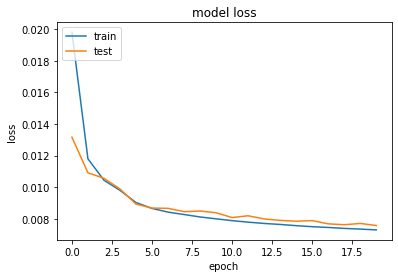

In [27]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()